In [1]:
import pandas as pd
import rpy2.robjects as ro
import rpy2.rinterface as ri
from rpy2.robjects import pandas2ri
from rpy2.robjects import numpy2ri
pandas2ri.activate()

In [51]:
%qtconsole

In [3]:
dat = pd.read_table('/home/jfear/sandbox/secim/data/QE2_mdw_8_NEG_Peak_List_PA_preprocess_20150507_log.tsv')
dat.set_index('rowID', inplace=True)

In [4]:
r = ro.r
rna = r['na.exclude']
rprincomp = r['princomp']
rsummary = r['summary']

In [5]:
res = rprincomp(rna(dat), cor=ri.TRUE)
summary = rsummary(res, loadings=ri.TRUE)

In [6]:
sdev = summary.rx2('sdev')
loadings = summary.rx2('loadings')

In [7]:
loadings_df = pandas2ri.ri2py_dataframe(loadings)

In [8]:
loadings_index = pandas2ri.ri2py_vector(loadings.names[0])
loadings_col = pandas2ri.ri2py_vector(loadings.names[1])

In [11]:
loadings_df.set_index(loadings_index, inplace=True)

In [13]:
x = loadings_df.iloc[0]
y = loadings_df.iloc[1]
z = loadings_df.iloc[2]

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [24]:
import mpld3 as mp

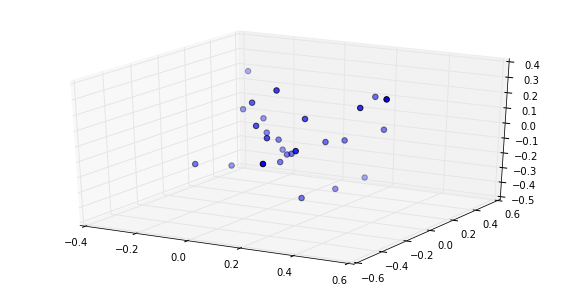

In [81]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='o', s=30)
ax.elev -= 5